In [2]:
import pandas as pd

users = pd.read_csv("resources/data/users.csv")

In [3]:
users.head(5)

,Unnamed: 0,user_id,user_gender,user_age,item_code,item_name,item_add_name,item_brand,category,sub1_category,sub2_category,buy_price,buy_count
0,0,2391853,M,40,114,가고시마 현미흑초 720㎖,1개,가고시마,건강식품,영양제,기타영양제,43000,1
1,1,1799897,F,40,114,가고시마 현미흑초 720㎖,1개,가고시마,건강식품,영양제,기타영양제,43000,1
2,2,1614947,F,50,189,신가네여주농장 여주즙 100ml 50팩 1박스 청정지역철원재배생산,1개,신가네여주농장,건강식품,건강진액,채소즙,50000,1
3,3,1614947,F,50,189,신가네여주농장 여주즙 100ml 50팩 1박스 청정지역철원재배생산,1개,신가네여주농장,건강식품,건강진액,채소즙,50000,1
4,4,1614947,F,50,804126,새우볶음밥 270g,5개,천일냉동,냉동식품,냉동간편식,냉동밥,1990,5


### gender 변환

In [4]:
gender_mapping = {'M': 0, 'F': 1}
users['gender'] = users['user_gender'].map(gender_mapping)

In [5]:
users.head(3)

,Unnamed: 0,user_id,user_gender,user_age,item_code,item_name,item_add_name,item_brand,category,sub1_category,sub2_category,buy_price,buy_count,gender
0,0,2391853,M,40,114,가고시마 현미흑초 720㎖,1개,가고시마,건강식품,영양제,기타영양제,43000,1,0
1,1,1799897,F,40,114,가고시마 현미흑초 720㎖,1개,가고시마,건강식품,영양제,기타영양제,43000,1,1
2,2,1614947,F,50,189,신가네여주농장 여주즙 100ml 50팩 1박스 청정지역철원재배생산,1개,신가네여주농장,건강식품,건강진액,채소즙,50000,1,1


### age 변환

In [7]:
import numpy as np

bins = [1, 29, 39, 49, 59, np.inf]
labels = ['Youth', 'Adult30', 'Adult40', 'Adult50', 'Senior']
users['age_group'] = pd.cut(users['user_age'], bins, right = True, labels = labels)
age_mapping = {
    'Youth': 1,
    'Adult30': 2,
    'Adult40': 3,
    'Adult50': 4,
    'Senior': 5
}

users['age_group'] = users['age_group'].map(age_mapping)

In [8]:
users.head(3)

,Unnamed: 0,user_id,user_gender,user_age,item_code,item_name,item_add_name,item_brand,category,sub1_category,sub2_category,buy_price,buy_count,gender,age_group
0,0,2391853,M,40,114,가고시마 현미흑초 720㎖,1개,가고시마,건강식품,영양제,기타영양제,43000,1,0,3
1,1,1799897,F,40,114,가고시마 현미흑초 720㎖,1개,가고시마,건강식품,영양제,기타영양제,43000,1,1,3
2,2,1614947,F,50,189,신가네여주농장 여주즙 100ml 50팩 1박스 청정지역철원재배생산,1개,신가네여주농장,건강식품,건강진액,채소즙,50000,1,1,4


### 카테고리 수치화하기

In [9]:
users['category'].value_counts()

건강식품    15428
음료       7084
축산물      4383
냉동식품     4288
과일       3549
냉장식품     2141
Name: category, dtype: int64

In [10]:
users['sub1_category'].value_counts()

영양제          8843
생수           5670
닭고기류         4351
냉동간편식        4288
홍삼/인삼가공식품    2692
견과류          2163
포장반찬         2141
건강진액         2031
건강보조식품       1862
국산과일         1386
두유            910
기능성음료         504
축산선물세트         32
Name: sub1_category, dtype: int64

In [11]:
users['sub2_category'].value_counts()

생수           5663
닭가슴살         4239
일반비타민        2933
기타냉동간편식      2823
김치류          2045
             ... 
닭윗날개(봉)         2
닭아랫날개(윙)        1
오리고기            1
비타민/에너지음료       1
볶음반찬            1
Name: sub2_category, Length: 83, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(users['category'])

users['category'] = encoder.transform(users['category'])

In [21]:
encoder = LabelEncoder()
encoder.fit(users['sub1_category'])

users['sub1_category'] = encoder.transform(users['sub1_category'])

In [23]:
encoder = LabelEncoder()
encoder.fit(users['sub2_category'])

users['sub2_category'] = encoder.transform(users['sub2_category'])

### 상관관계

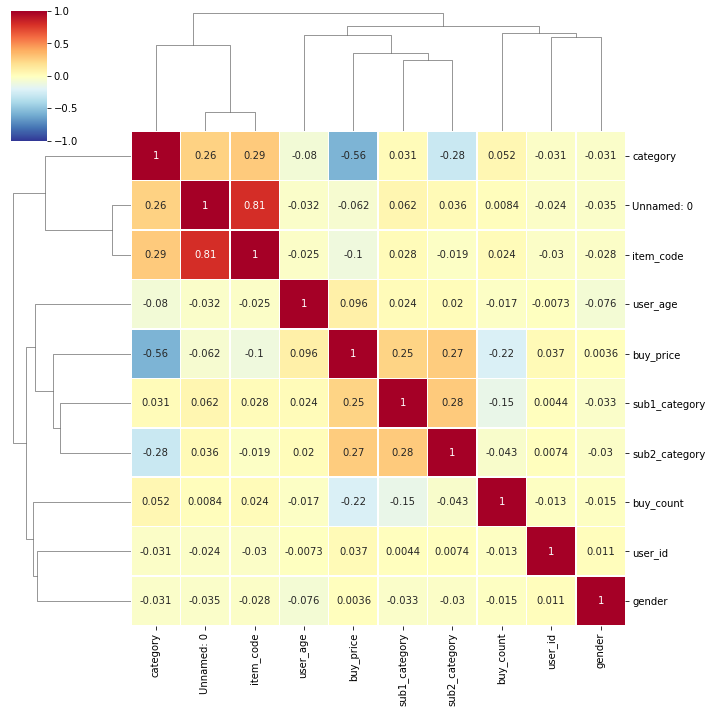

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

def make_corr(data):
    make_corr = data.corr()
    sns.clustermap(make_corr, annot = True, cmap = 'RdYlBu_r', linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1, vmax = 1)
    plt.show()
    
    
make_corr(users)

In [ ]:
make_